1.4
1.0
1.0
1.0
1.0
1.012779552715655
1.0
1.0
1.0
1.0
2.1683501683501682
1.0
1.0
1.0
1.0


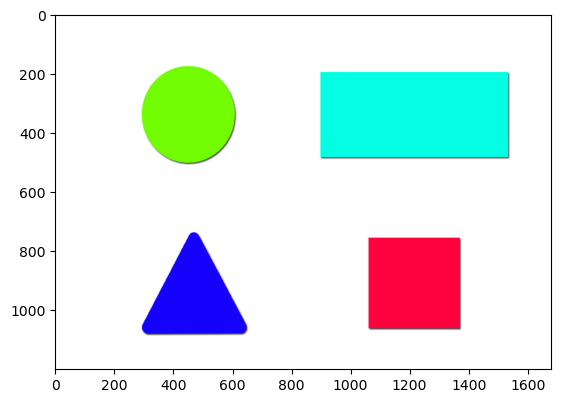

In [10]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('R.jpeg')
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thrash = cv2.threshold(imgGrey, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)          
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)          
    x = approx.ravel()[0]          
    y = approx.ravel()[1] - 5           
    if len(approx) == 3:          
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))               
    elif len(approx) == 4 :         
        x1 ,y1, w, h = cv2.boundingRect(approx)                
        aspectRatio = float(w)/h                
        print(aspectRatio)                
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:               
          cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))                
        else:                
          cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))                     
    elif len(approx) == 5:           
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))                
    elif len(approx) == 10:           
        cv2.putText(img, "Star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))                
    else:            
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2.imshow( '',img)

cv2.waitKey(0)
cv2.destroyAllWindows()